##Crop Yield Prediction

  By: -  Rishabh Awasthy

The research embarked on a mission to bridge a notable gap in achieving precise crop yield predictions. By proposing a novel approach that integrates advanced machine learning techniques with a rich tapestry of environmental, agronomic, and historical data, the study not only advances agricultural data science but also provides a practical tool for stakeholders.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys

!{sys.executable} -m pip install -U ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
from pathlib import Path

import numpy as np
import pandas as pd
import requests

import ydata_profiling
from ydata_profiling.utils.cache import cache_file

In [ ]:
data =pd.read_csv("/content/Train (1).csv")

In [ ]:
data.shape

(3870, 44)

##EDA using Sickit Learn

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns (excluding 'id' columns)
categorical_columns = data.select_dtypes(include=['object']).columns.difference(['ID'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to all categorical columns
data[categorical_columns] = data[categorical_columns].apply(lambda col: label_encoder.fit_transform(col) if col.name in categorical_columns else col)




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   int64  
 2   Block                               3870 non-null   int64  
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   int64  
 6   CropTillageDate                     3870 non-null   int64  
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   int64  
 9   RcNursEstDate                       3870 non-null   int64  
 10  SeedingSowingTransplanting          3870 non-null   int64  
 11  SeedlingsPerPit                     3581 no

In [ ]:
data.shape

(3870, 44)

In [ ]:
data.head(20)

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,2,6,45,40,18,49,5,3,26,...,1,54,NaN,41,1,30,40,1,0.312500,600
1,ID_TK40ARLSPOKS,2,7,26,26,41,47,5,3,19,...,0,63,3.0,79,1,24,10,1,0.312500,600
2,ID_1FJY2CRIMLZZ,0,2,10,10,18,29,6,3,19,...,0,80,480.0,96,1,30,10,1,0.148148,225
3,ID_I3IPXS4DB7NE,0,2,15,15,18,15,6,3,16,...,0,70,240.0,84,0,26,10,1,0.222222,468
4,ID_4T8YQWXWHB4A,2,6,60,60,24,48,4,3,20,...,1,68,NaN,57,1,24,40,1,0.468750,550
5,ID_W5MM9H353RL9,3,1,10,5,15,31,6,2,14,...,0,31,600.0,29,0,30,10,1,0.136364,205
6,ID_6O44Z25H1JAV,1,4,12,12,15,52,3,3,34,...,0,42,130.0,63,1,25,10,1,0.136364,270
7,ID_VRI9LEL2W3DR,2,7,80,80,6,26,4,0,61,...,1,73,NaN,61,0,25,40,1,0.250000,490
8,ID_6YA9Y09O55LE,1,4,25,25,15,53,4,3,38,...,0,45,130.0,70,1,26,10,1,0.227273,425
9,ID_EDA8RK1CP60K,2,6,20,10,29,43,5,3,26,...,0,36,80.0,39,0,22,10,1,0.156250,300


In [ ]:
data.describe()

,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,...,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
count,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,...,3870.000000,3870.000000,3618.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,1.667442,4.515504,28.527907,24.727132,23.573127,40.469509,4.488372,2.768475,26.819121,24.793023,...,0.058915,50.454264,536.622443,67.114470,0.542119,26.517829,11.767442,0.993798,0.292826,594.269251
std,1.011564,2.221664,30.454218,27.994802,11.118860,13.929668,1.133044,0.642783,12.832413,11.699247,...,0.235495,17.056786,1138.613827,33.265376,0.498287,3.192873,7.064864,0.078516,0.206918,651.916953
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,10.000000,0.000000,0.045455,4.000000
25%,1.000000,3.000000,12.000000,10.000000,15.000000,31.000000,4.000000,3.000000,19.000000,17.000000,...,0.000000,40.000000,150.000000,40.000000,0.000000,25.000000,10.000000,1.000000,0.156250,300.000000
50%,2.000000,5.000000,20.000000,20.000000,18.000000,43.000000,4.000000,3.000000,26.000000,24.000000,...,0.000000,51.000000,400.000000,68.000000,1.000000,26.000000,10.000000,1.000000,0.227273,425.000000
75%,3.000000,7.000000,35.000000,30.000000,38.000000,51.000000,5.000000,3.000000,33.000000,32.000000,...,0.000000,63.000000,700.000000,87.000000,1.000000,30.000000,10.000000,1.000000,0.370370,740.000000
max,3.000000,8.000000,800.000000,800.000000,42.000000,77.000000,8.000000,3.000000,61.000000,61.000000,...,1.000000,106.000000,60000.000000,161.000000,1.000000,30.000000,40.000000,1.000000,2.187500,16800.000000


In [ ]:
missing_data = data.isnull().sum()
columns_with_missing_data = missing_data[missing_data > 0]
print(columns_with_missing_data)

SeedlingsPerPit                  289
TransplantingIrrigationHours     193
TransIrriCost                    882
StandingWater                    238
Ganaura                         2417
CropOrgFYM                      2674
BasalDAP                         543
BasalUrea                       1704
1tdUrea                          556
1appDaysUrea                     556
2tdUrea                         2694
2appDaysUrea                    2700
Harv_hand_rent                   252
dtype: int64


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(25,15))
plt.show()

##EDA using Pandas Profiling

In [ ]:
report = data.profile_report(
    sort=None, html={"style": {"full_width": True}}, progress_bar=True
)
report

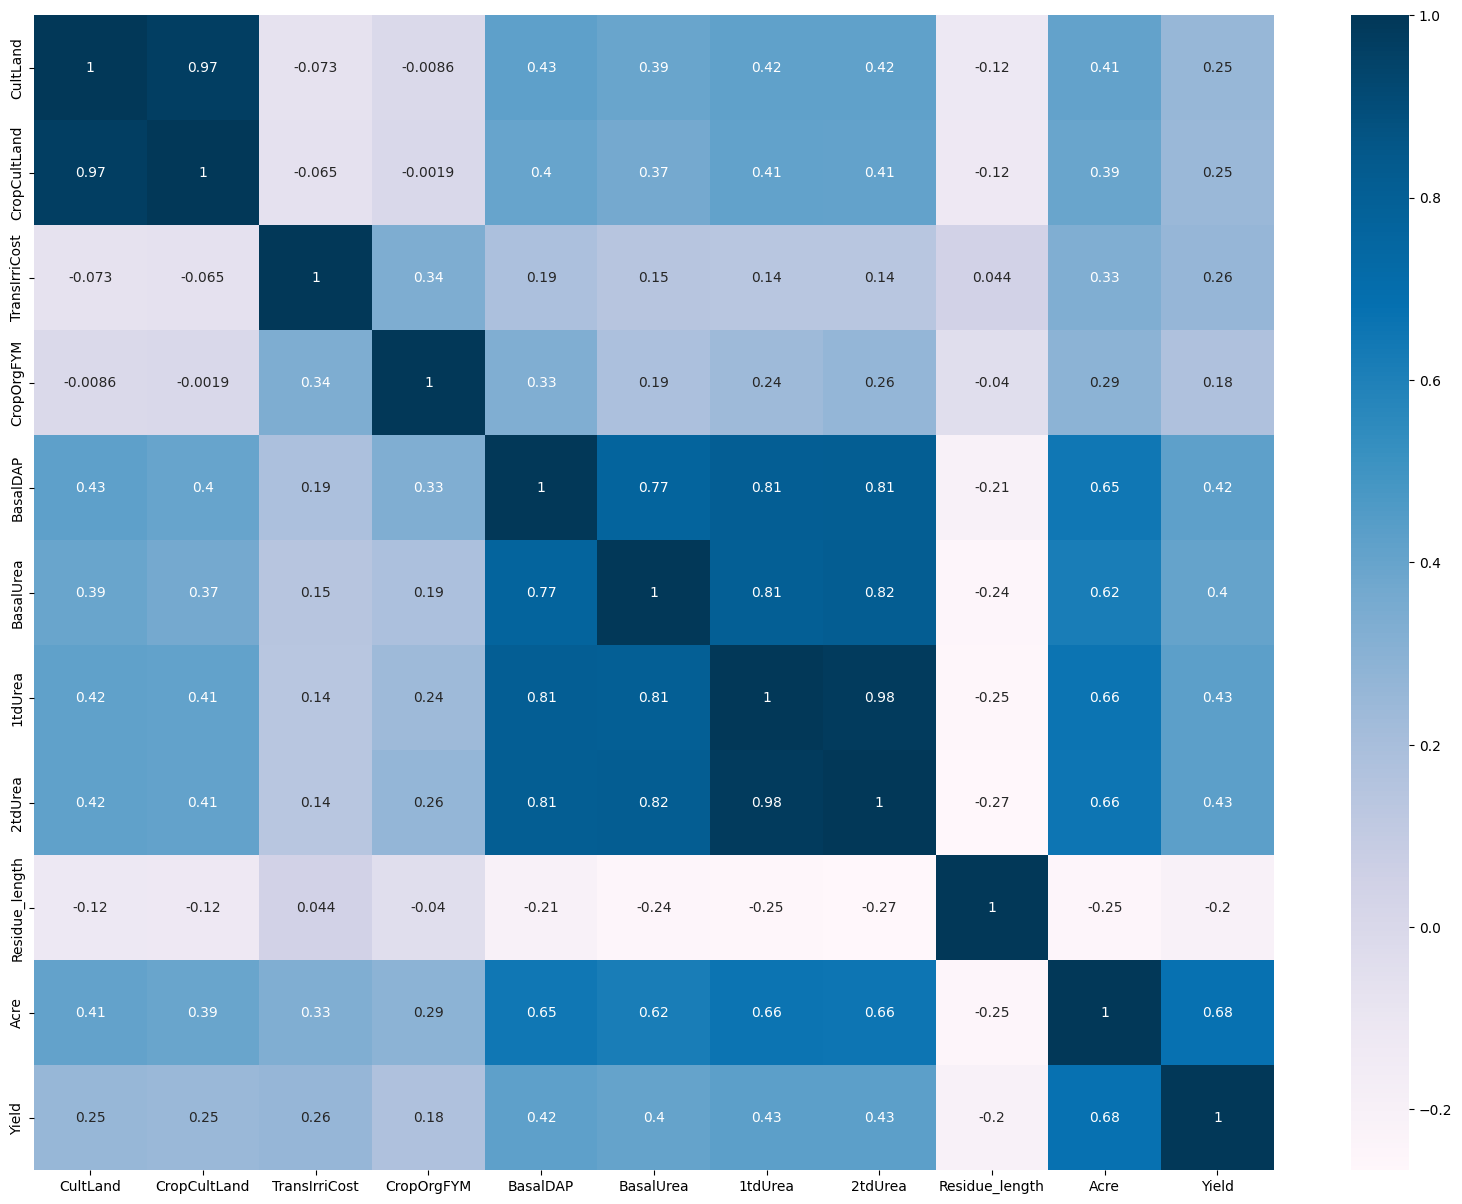

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [ ]:
corr_matrix = data.corr()
corr_matrix["Yield"].sort_values(ascending=False)

<ipython-input-408-082d9211233b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


Yield                                 1.000000
Acre                                  0.676554
2tdUrea                               0.644100
BasalDAP                              0.419260
1tdUrea                               0.417841
CropOrgFYM                            0.372322
BasalUrea                             0.323633
TransIrriCost                         0.274761
CultLand                              0.254201
CropCultLand                          0.246221
Harv_hand_rent                        0.181270
2appDaysUrea                          0.167423
Harv_date                             0.159236
Threshing_date                        0.126265
CropTillageDate                       0.109539
Residue_perc                          0.068579
Harv_method                           0.068579
LandPreparationMethod                 0.036784
Threshing_method                      0.036026
CropbasalFerts                        0.026351
Block                                 0.016678
MineralFertAp

Keeping Columns That have correlation with target value more than 20%, This step is necessary for Dimensional reduction

In [ ]:
import pandas as pd
corr_matrix = data.corr()
correlation_threshold = 0.20  # Set desired correlation threshold

# Get the names of features to keep based on the correlation
features_to_keep = corr_matrix.columns[corr_matrix["Yield"].abs() >= correlation_threshold].tolist()

# Display the names of features to keep
print(features_to_keep)


['CultLand', 'CropCultLand', 'TransIrriCost', 'BasalDAP', 'BasalUrea', '1tdUrea', '2tdUrea', 'Residue_length', 'Acre', 'Yield']


In [ ]:
data = data[features_to_keep]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District         3870 non-null   int64  
 1   CultLand         3870 non-null   int64  
 2   CropCultLand     3870 non-null   int64  
 3   CropTillageDate  3870 non-null   int64  
 4   TransIrriCost    2988 non-null   float64
 5   CropOrgFYM       1196 non-null   float64
 6   BasalDAP         3327 non-null   float64
 7   BasalUrea        2166 non-null   float64
 8   1tdUrea          3314 non-null   float64
 9   2tdUrea          1176 non-null   float64
 10  2appDaysUrea     1170 non-null   float64
 11  Harv_date        3870 non-null   int64  
 12  Harv_hand_rent   3618 non-null   float64
 13  Threshing_date   3870 non-null   int64  
 14  Residue_length   3870 non-null   int64  
 15  Acre             3870 non-null   float64
 16  Yield            3870 non-null   int64  
dtypes: float64(9),

In [ ]:
data.head(10)

,District,CultLand,CropCultLand,CropTillageDate,TransIrriCost,CropOrgFYM,BasalDAP,BasalUrea,1tdUrea,2tdUrea,2appDaysUrea,Harv_date,Harv_hand_rent,Threshing_date,Residue_length,Acre,Yield
0,2,45,40,49,200.0,10.0,15.0,20.0,15.0,15.0,NaN,54,NaN,41,30,0.312500,600
1,2,26,26,47,125.0,5.0,15.0,10.0,20.0,20.0,NaN,63,3.0,79,24,0.312500,600
2,0,10,10,29,80.0,1.0,4.0,5.0,5.0,5.0,NaN,80,480.0,96,30,0.148148,225
3,0,15,15,15,1.5,1.5,6.0,3.0,5.0,5.0,NaN,70,240.0,84,26,0.222222,468
4,2,60,60,48,300.0,15.0,15.0,30.0,30.0,30.0,NaN,68,NaN,57,24,0.468750,550
5,3,10,5,31,5.0,5.0,6.0,6.0,6.0,6.0,NaN,31,600.0,29,30,0.136364,205
6,1,12,12,52,3.0,3.0,3.0,6.0,4.0,6.0,67.0,42,130.0,63,25,0.136364,270
7,2,80,80,26,4.0,4.0,15.0,8.0,15.0,15.0,NaN,73,NaN,61,25,0.250000,490
8,1,25,25,53,2.0,2.0,5.0,7.0,5.0,7.0,58.0,45,130.0,70,26,0.227273,425
9,2,20,10,43,100.0,5.0,5.0,10.0,5.0,5.0,NaN,36,80.0,39,22,0.156250,300


In [ ]:
data.shape

(3870, 17)

In [ ]:
missing_data = data.isnull().sum()
columns_with_missing_data = missing_data[missing_data > 0]
print(columns_with_missing_data)

TransIrriCost     882
CropOrgFYM       2674
BasalDAP          543
BasalUrea        1704
1tdUrea           556
2tdUrea          2694
dtype: int64


##Replacing Null Values by comparing the Correlation of features with each other

In [ ]:
# Replace missing values in '2tdUrea' with values from '1tdUrea'
data['2tdUrea'].fillna(data['1tdUrea'], inplace=True)

In [ ]:
# Replace missing values in '2tdUrea' with values from 'BasalUrea'
data['2tdUrea'].fillna(data['BasalUrea'], inplace=True)

In [ ]:
# Replace missing values in '2tdUrea' with values from 'BasalDAP'
data['2tdUrea'].fillna(data['BasalDAP'], inplace=True)

In [ ]:
# Replace missing values in '1tdUrea' with values from '2tdUrea'
data['1tdUrea'].fillna(data['2tdUrea'], inplace=True)

In [ ]:
# Replace missing values in 'BasalDAP' with values from '2tdUrea'
data['BasalDAP'].fillna(data['2tdUrea'], inplace=True)

In [ ]:
# Replace missing values in 'BasalUrea' with values from '2tdUrea'
data['BasalUrea'].fillna(data['2tdUrea'], inplace=True)

In [ ]:
data['TransIrriCost'].fillna(data['CropOrgFYM'], inplace=True)

As CropOrgFYM corelation is 50% with BasalUrea, So I divide BasalUrea by 2 add fill it with nan of CropOrgFYM

In [ ]:
mask = data['CropOrgFYM'].isna() & ~data['BasalUrea'].isna()
data.loc[mask, 'CropOrgFYM'] = data.loc[mask, 'BasalUrea'] / 2

Now checking If any other missing value remain

In [ ]:
missing_data = data.isnull().sum()
columns_with_missing_data = missing_data[missing_data > 0]
print(columns_with_missing_data)

Series([], dtype: int64)


In [ ]:
data.isnull().sum()

CultLand          0
CropCultLand      0
TransIrriCost     0
CropOrgFYM        0
BasalDAP          0
BasalUrea         0
1tdUrea           0
2tdUrea           0
Residue_length    0
Acre              0
Yield             0
dtype: int64

In [ ]:
data.head()

,CultLand,CropCultLand,TransIrriCost,CropOrgFYM,BasalDAP,BasalUrea,1tdUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Acre,Yield
0,45,40,200.0,NaN,15.0,20.0,15.0,15.0,NaN,NaN,30,0.312500,600
1,26,26,125.0,NaN,15.0,10.0,20.0,20.0,NaN,3.0,24,0.312500,600
2,10,10,80.0,1.0,4.0,5.0,5.0,5.0,NaN,480.0,30,0.148148,225
3,15,15,NaN,NaN,6.0,3.0,5.0,5.0,NaN,240.0,26,0.222222,468
4,60,60,300.0,NaN,15.0,30.0,30.0,30.0,NaN,NaN,24,0.468750,550


In [ ]:
data_set=data

In [ ]:
data_set.head()

,CultLand,CropCultLand,TransIrriCost,CropOrgFYM,BasalDAP,BasalUrea,1tdUrea,2tdUrea,Residue_length,Acre,Yield
0,45,40,200.0,10.0,15.0,20.0,15.0,15.0,30,0.312500,600
1,26,26,125.0,5.0,15.0,10.0,20.0,20.0,24,0.312500,600
2,10,10,80.0,1.0,4.0,5.0,5.0,5.0,30,0.148148,225
3,15,15,1.5,1.5,6.0,3.0,5.0,5.0,26,0.222222,468
4,60,60,300.0,15.0,15.0,30.0,30.0,30.0,24,0.468750,550


##Building Models

***DNN Using TensorFlow***

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
# Select features and target variable
features = data_set.drop(['Yield'], axis=1)  # Exclude 'ID' from features
target = data_set['Yield']

# One-hot encode categorical variables if needed
# features = pd.get_dummies(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Assuming a regression task, adjust for classification
])

# Compile the model
model.compile(optimizer='adam', loss='mae')  # Adjust for your specific problem

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
predictions = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})  # Corrected 'y_pred' to 'predictions.flatten()'
print(results)
mae = mean_absolute_error(y_test, predictions.flatten())  # Corrected 'y_pred' to 'predictions.flatten()'
print(f'DNN Using TensorFlow Mean Absolute Error on Test Set: {mae}')


Epoch 1/500
97/97 [==============================] - 3s 4ms/step - loss: 408.2564 - val_loss: 344.3925
Epoch 2/500
97/97 [==============================] - 0s 3ms/step - loss: 236.4529 - val_loss: 270.5480
Epoch 3/500
97/97 [==============================] - 0s 3ms/step - loss: 218.2120 - val_loss: 267.2383
Epoch 4/500
97/97 [==============================] - 0s 3ms/step - loss: 215.5139 - val_loss: 265.2887
Epoch 5/500
97/97 [==============================] - 0s 3ms/step - loss: 212.0283 - val_loss: 262.8078
Epoch 6/500
97/97 [==============================] - 0s 3ms/step - loss: 209.3671 - val_loss: 260.6110
Epoch 7/500
97/97 [==============================] - 0s 3ms/step - loss: 207.3417 - val_loss: 259.3683
Epoch 8/500
97/97 [==============================] - 0s 3ms/step - loss: 205.7419 - val_loss: 258.6053
Epoch 9/500
97/97 [==============================] - 0s 3ms/step - loss: 204.1757 - val_loss: 258.0833
Epoch 10/500
97/97 [==============================] - 0s 3ms/step - loss:

***DNN Using PyTorch***

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
# Select features and target variable
features = data_set.drop(['Yield'], axis=1)  # Exclude 'ID' from features
target = data_set['Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # Reshape to (num_samples, 1)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)  # Reshape to (num_samples, 1)

# Build the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

model = NeuralNetwork(input_size=X_train_tensor.shape[1])

# Loss function and optimizer
criterion = nn.L1Loss()  # Mean Absolute Error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 500
batch_size = 32

for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluation on the test set
with torch.no_grad():
    model.eval()
    predictions = model(X_test_tensor)
    mae = mean_absolute_error(y_test_tensor.numpy(), predictions.numpy())

# Display the results
results = pd.DataFrame({'Actual': y_test_tensor.numpy().flatten(), 'Predicted': predictions.numpy().flatten()})
print(results)
print(f'DNN Using PyTorch Mean Absolute Error on Test Set: {mae}')


     Actual    Predicted
0     650.0   470.346100
1     560.0   428.381073
2     400.0   412.426971
3     500.0   396.963104
4    1650.0  2143.394531
..      ...          ...
769   390.0   774.884216
770   450.0   435.353607
771   534.0   440.914703
772   270.0   230.681992
773    80.0    87.132751

[774 rows x 2 columns]
DNN Using PyTorch Mean Absolute Error on Test Set: 142.15101623535156


***KNN Model***

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd

# Implement custom Lp norm distance function
def custom_lp_distance(x, y, p=2):
    return np.power(np.sum(np.abs(x - y) ** p), 1/p)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define a range of p values to try
p_values = [2]

# Initialize variables to store the best p, k, and minimum MAE
best_p = None
best_k = None
min_mae = float('inf')

# Perform cross-validation for each p value
for p_value in p_values:
    # Define a range of k values to try
    k_values = [50, 100, 200, 400, 800, 1600, 3000]

    # Perform cross-validation for each k value
    for k in k_values:
        knn_model = KNeighborsRegressor(n_neighbors=k, metric=custom_lp_distance,weights='distance', p=p_value)
        cv_scores = cross_val_score(knn_model, features, target, cv=5, scoring='neg_mean_absolute_error')

        # Calculate and print the average MAE across folds
        average_mae = -np.mean(cv_scores)
        print(f'p={p_value}, k={k}, Average Mean Absolute Error: {average_mae}')

        # Update best_p, best_k, and min_mae if a new minimum MAE is found
        if average_mae < min_mae:
            best_p = p_value
            best_k = k
            min_mae = average_mae

# Initialize the KNN regressor with the best p and k values
best_knn_model = KNeighborsRegressor(n_neighbors=best_k, metric=custom_lp_distance,weights='distance', p=best_p)

# Train the KNN model
best_knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test)

# Print actual vs predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'KNN Mean Absolute Error: {mae}')

# Now you can use the trained model to make predictions on new data
# For example, you can use best_knn_model.predict(new_data) for new_data


p=2, k=50, Average Mean Absolute Error: 202.900225073498
p=2, k=100, Average Mean Absolute Error: 207.49743068601023
p=2, k=200, Average Mean Absolute Error: 217.35061834910175
p=2, k=400, Average Mean Absolute Error: 234.88456210211385
p=2, k=800, Average Mean Absolute Error: 250.38091001467038
p=2, k=1600, Average Mean Absolute Error: 260.66571438484726
p=2, k=3000, Average Mean Absolute Error: 267.6868916794804
      Actual    Predicted
2176     650   504.123682
1421     560   521.504751
2480     400   450.000000
1586     500   400.000000
952     1650  1112.430799
...      ...          ...
2422     390   978.950246
1159     450   436.812540
2688     534   510.000000
2801     270   566.439246
691       80   199.902254

[774 rows x 2 columns]
KNN Mean Absolute Error: 245.63562130710153


###***ElasticNet model***

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
# Build and train the ElasticNet model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust alpha and l1_ratio
elastic_net_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = elastic_net_model.predict(X_test_scaled)

# Display the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Elastic Net Model Mean Absolute Error on Test Set: {mae}')


      Actual    Predicted
2176     650   491.406251
1421     560   427.459160
2480     400   430.634918
1586     500   479.571253
952     1650  2172.372132
...      ...          ...
2422     390   646.570926
1159     450   389.812395
2688     534   406.110472
2801     270   297.501555
691       80   125.043582

[774 rows x 2 columns]
Elastic Net Model Mean Absolute Error on Test Set: 214.25858467801345


###***Random Forest model***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Build and train the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
Rpredictions = random_forest_model.predict(X_test_scaled)

# Display the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': Rpredictions})
print(results)

# Evaluate the model
mae = mean_absolute_error(y_test, Rpredictions)
print(f'Random Forest Mean Absolute Error on Test Set: {mae}')


      Actual    Predicted
2176     650   447.310000
1421     560   490.450000
2480     400   448.000000
1586     500   406.392460
952     1650  2278.350000
...      ...          ...
2422     390   714.346667
1159     450   411.905000
2688     534   496.310000
2801     270   238.940000
691       80    79.950000

[774 rows x 2 columns]
Random Forest Mean Absolute Error on Test Set: 141.68252056813716


###***Decision Tree model***

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
# Build and train the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = decision_tree_model.predict(X_test_scaled)

# Display the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Decision Tree Mean Absolute Error on Test Set: {mae}')


      Actual    Predicted
2176     650   450.000000
1421     560   569.000000
2480     400   450.000000
1586     500   400.000000
952     1650  1875.000000
...      ...          ...
2422     390   843.333333
1159     450   400.000000
2688     534   510.000000
2801     270   240.000000
691       80    70.000000

[774 rows x 2 columns]
Decision Tree Mean Absolute Error on Test Set: 158.6299095607235


###***Support Vector Regressor Model***

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Build and train the SVR model
svr_model = SVR(kernel='rbf')  # 'rbf' stands for radial basis function, you can experiment with other kernels
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = svr_model.predict(X_test_scaled)

# Display the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'SVR Mean Absolute Error on Test Set: {mae}')


      Actual   Predicted
2176     650  486.463313
1421     560  416.579888
2480     400  390.829933
1586     500  377.948365
952     1650  616.478809
...      ...         ...
2422     390  556.769904
1159     450  384.169215
2688     534  378.082328
2801     270  300.359896
691       80  278.068251

[774 rows x 2 columns]
SVR Mean Absolute Error on Test Set: 274.74520402721856


###***Linear Regression model***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
# Build and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = linear_model.predict(X_test_scaled)

# Display the results
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Linear Regression Mean Absolute Error on Test Set: {mae}')


      Actual    Predicted
2176     650   426.266921
1421     560   415.405420
2480     400   426.271397
1586     500   451.572265
952     1650  2253.322871
...      ...          ...
2422     390   726.473055
1159     450   398.884137
2688     534   415.428937
2801     270   249.119341
691       80    45.601882

[774 rows x 2 columns]
Linear Regression Mean Absolute Error on Test Set: 173.46452090283591


###MEAN ABSOLUTE ERROR OF ALL THE MODELS

###***Decision Tree Mean Absolute Error on Test Set= 158.6299095607235***

###DNN Using TensorFlow Mean Absolute Error on Test Set= 144.7482161571197

###***KNN Using PyTorch Mean Absolute Error on Test Set= 142.15101623535156***

###KNN Mean Absolute Error= 245.63562130710153

###***Elastic Net Model Mean Absolute Error on Test Set= 214.25858467801345***

###Random Forest Mean Absolute Error on Test Set= 141.68252056813716

###***SVR Mean Absolute Error on Test Set= 274.74520402721856***

###Linear Regression Mean Absolute Error on Test Set= 173.46452090283591

##This research not only expands the horizons of agricultural data science but also provides a roadmap for informed decision-making in agriculture—a crucial step toward ensuring global food security. Thank you for your attention